# EDA - Landing Club case study

### Problem Statement:
Conduct a comprehensive analysis of a dataset containing consumer attributes and loan attributes. Our goal is to gain insights into the factors influencing loan default rates and to develop strategies to mitigate risks associated with lending.



### Objectives:

**Importing necessary Modules**:
- Import the modules necessary for Data Manipulation and Visualization.

**Reading dataset**:
- Read the dataset containing loan applicant information.

**Exploring the Dataset**:
- Understand the Structure and various datatypes of the attributes within the dataset.

**Missing value analysis**:
- Identify and analyze missing values in the dataset.

**Analysing categorical and numerical columns**:
- Analyze categorical and numerical columns to understand the statistical properties and relationships within the dataset.

**Univariate Analysis**:
- Conduct univariate analysis to explore the distribution and characteristics of individual variables.

**Outliers**:
- Identify and analyze outliers within the dataset to understand their impact on the analysis.

**Bivariate analysis**:
- Conduct bivariate analysis to explore relationships between different variables and their impact on loan default rates.

In [50]:
#!pip install sketch

In [51]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
pd.options.display.max_columns=None
pd.options.display.max_rows=None
import sketch as sketch
import os
os.environ['SKETCH_MAX_COLUMNS']= '55'


In [52]:
df_loan=pd.read_csv("loan.csv")
df_loan.shape

(39717, 111)

In [53]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [54]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [55]:
df_loan.isna().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [56]:
df_loan_percentage=round(df_loan.isna().sum()/len(df_loan)*100,2)
df_loan_percentage

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.59
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

## DATA CLEANING

In [57]:
## remove all null values columns

df_loan=df_loan.dropna(axis=1,how='all')

In [58]:

len(df_loan.columns)

57

In [59]:
# null % per column
round(df_loan.isna().sum()/len(df_loan)*100,2)


id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.59
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [60]:
df_loan.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [61]:
# cleaning
df_loan.int_rate=df_loan.int_rate.str.replace('%','')
df_loan.revol_util=df_loan.revol_util.str.replace('%','')
df_loan.term=df_loan.term.str.replace('months','')


In [62]:
#type conversion
df_loan.int_rate=df_loan.int_rate.astype(float)
df_loan.revol_util=df_loan.revol_util.astype(float)
df_loan.recoveries=df_loan.recoveries.astype(float)
#  df_loanrevol_bal
# df_loan.total_acc
# df_loan.funded_amnt
# df_loaninstallment
# df_loanout_prncp
# df_loantotal_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries']
df_loan.term=df_loan.term.astype(int)
df_loan.emp_length=df_loan.emp_length.astype(str)
df_loan.desc=df_loan.desc.astype(str)
df_loan.title=df_loan.title.astype(str)

In [63]:
# Handle missing values in `emp_length` by filling with "Unknown"
df_loan['emp_length'] = df_loan['emp_length'].fillna('Unknown')
df_loan['title'] = df_loan['title'].fillna('Unknown')
df_loan['desc'] = df_loan['desc'].fillna('')
df_loan['chargeoff_within_12_mths'] = df_loan['chargeoff_within_12_mths'].fillna(0)
df_loan['pub_rec_bankruptcies'] = df_loan['pub_rec_bankruptcies'].fillna(0)


In [64]:
round(df_loan.isna().sum()/len(df_loan)*100,2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     0.00
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                           0.00
purpose                        0.00
title                          0.00
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [65]:
df_loan.shape

(39717, 57)

In [66]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  int64  
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  39717 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [67]:
#Imputing missing values
# df.head()
#df_loan.sketch.ask("what is the dataset about")

In [68]:
#df_loan.sketch.ask("can you describe important columns")

In [69]:
#df_loan.sketch.ask("which columns are of no use for risk analysis")

In [70]:
#df_loan.sketch.ask('What insight can be gained from this dataset')

In [71]:
#df_loan.sketch.ask('can you draw some visualization to to gain the insight from this dataset')

In [72]:
#df_loan.sketch.ask("how to visualize Histogram of loan amounts")

In [73]:
df_loan[df_loan.desc.str.contains('score')==True]['desc'].str.split(pat='score')

8        [  Borrower added on 12/21/11 > I own a small ...
104      [  Borrower added on 12/14/11 > A little bit o...
121      [  Borrower added on 12/13/11 > I have a very ...
207      [  Borrower added on 12/13/11 > I have worked ...
213      [  Borrower added on 12/12/11 > This is a loan...
236      [  Borrower added on 12/14/11 > I plan on cons...
247      [  Borrower added on 12/12/11 > I've racked up...
380      [  Borrower added on 12/14/11 > i would really...
390      [  Borrower added on 12/10/11 > I am wanting t...
472      [  Borrower added on 12/09/11 > I am applying ...
475      [  Borrower added on 12/09/11 > Thanks for loo...
487      [  Borrower added on 12/09/11 > I plan to use ...
536      [  Borrower added on 12/12/11 > To whom it may...
551      [  Borrower added on 12/08/11 > Putting all th...
570      [  Borrower added on 12/10/11 > I will be usin...
697      [  Borrower added on 12/07/11 > Why I'm a good...
716      [  Borrower added on 12/07/11 > Loan is to lum.

This visualization can help us understand the distribution of loan amounts in the dataset. We can see that most loans fall in the range of $5,000 to $15,000

In [74]:
#df_loan.sketch.ask("how to visualize  Box plot of interest rates by loan grade:")

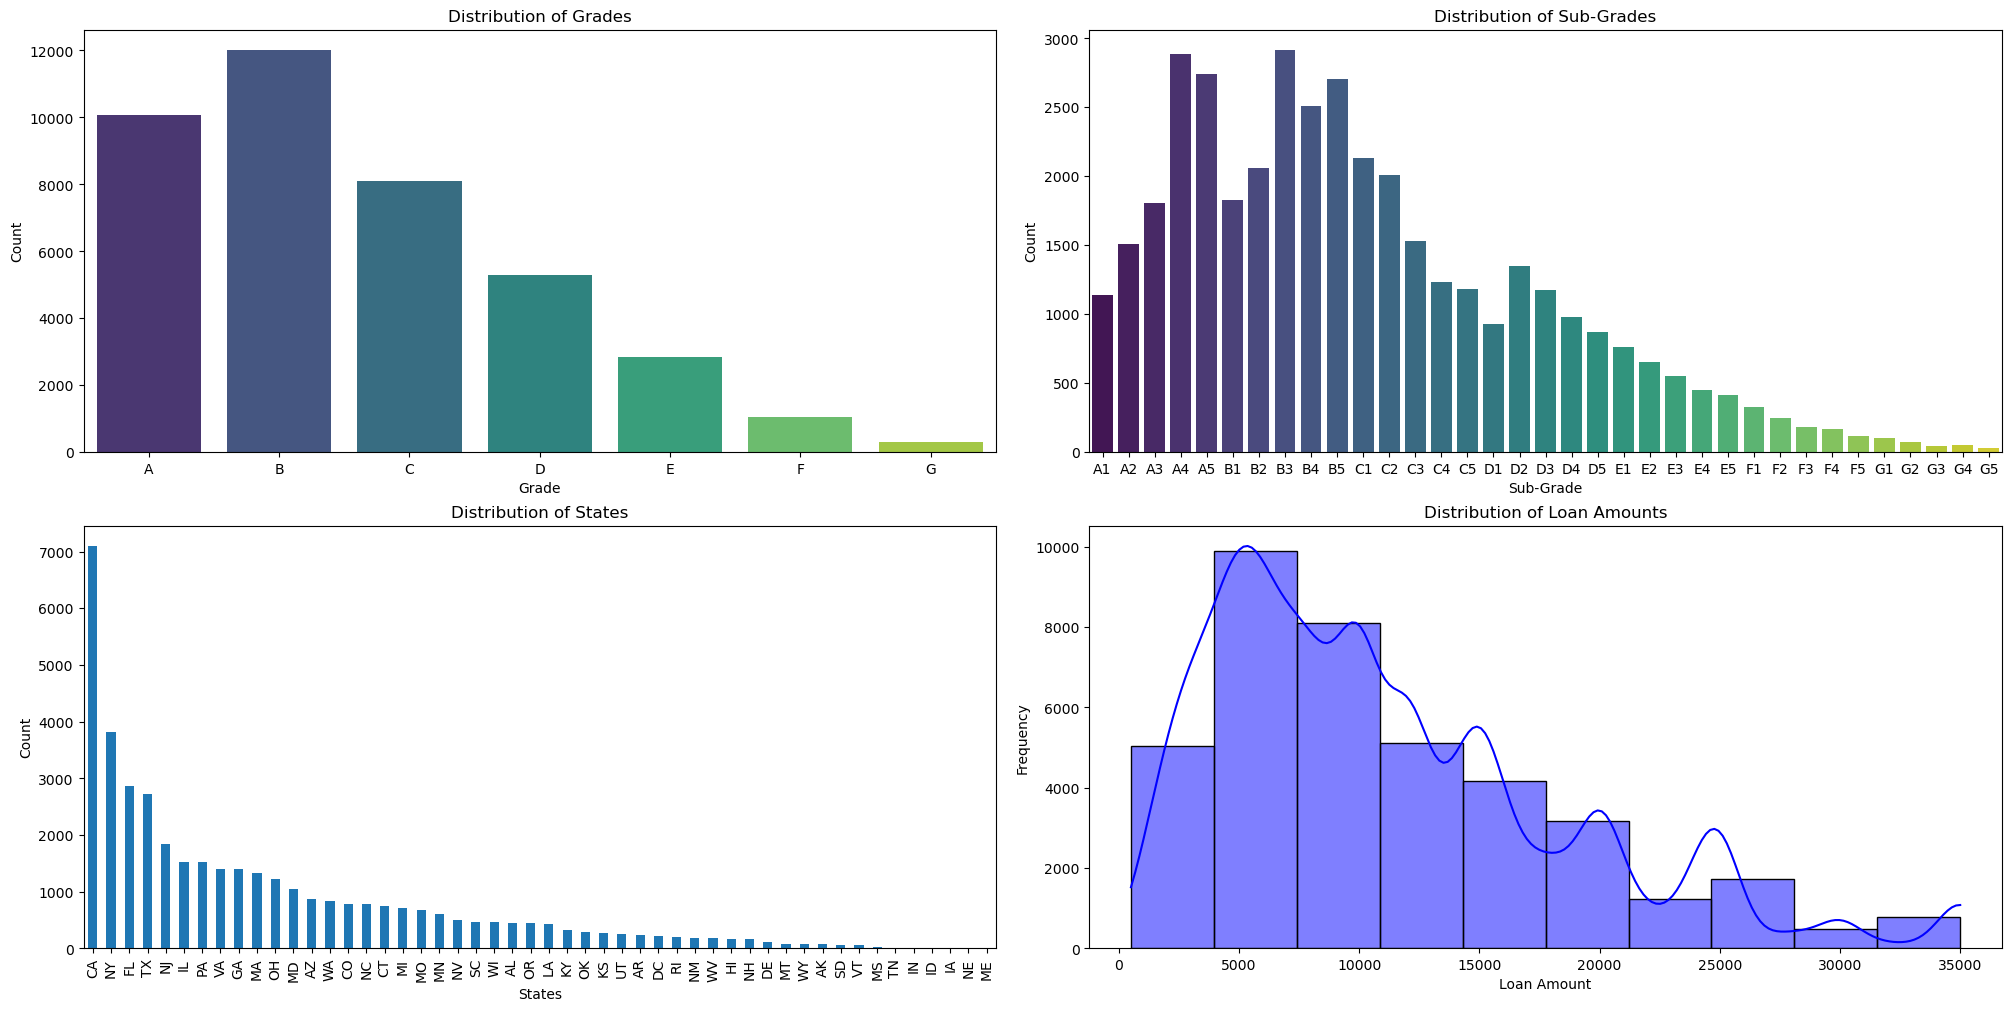

In [75]:
from matplotlib.gridspec import GridSpec
fig=plt.figure(constrained_layout=True,figsize=(20,10))
gs=GridSpec(2,2,figure=fig)
#Grade Analysis
ax6=fig.add_subplot(gs[0,0])
sns.countplot(data=df_loan, x='grade', order=sorted(df_loan['grade'].unique()), palette='viridis',ax=ax6)
plt.title('Distribution of Grades')
plt.xlabel('Grade')
plt.ylabel('Count')

#Sub-Grade Analysis
ax5=fig.add_subplot(gs[0,1])
sns.countplot(data=df_loan, x='sub_grade', order=sorted(df_loan['sub_grade'].unique()), palette='viridis',ax=ax5)
plt.title('Distribution of Sub-Grades')
plt.xlabel('Sub-Grade')
plt.ylabel('Count')

#State Analysis

ax5=fig.add_subplot(gs[1,0])
#sns.countplot(data=df_loan, x='addr_state', order=df_loan['addr_state'].unique(), palette='viridis',ax=ax5)
df_loan.addr_state.value_counts().plot(kind='bar')
plt.title('Distribution of States')
plt.xlabel('States')
plt.ylabel('Count')

ax5=fig.add_subplot(gs[1,1])
sns.histplot(df_loan['loan_amnt'], kde=True, bins=10, color='blue',ax=ax5)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()
plt.show()

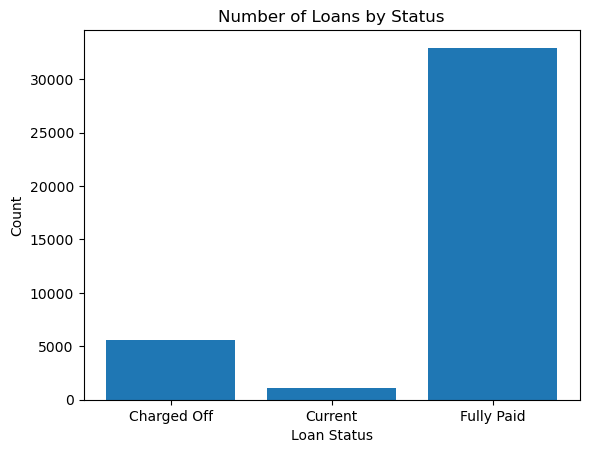

In [76]:
loan_status_counts = df_loan.groupby('loan_status').count()['id'] #
plt.bar(loan_status_counts.index, loan_status_counts)
plt.xlabel('Loan Status') 
plt.ylabel('Count')
plt.title('Number of Loans by Status')
 # Display the chart 
plt.show()

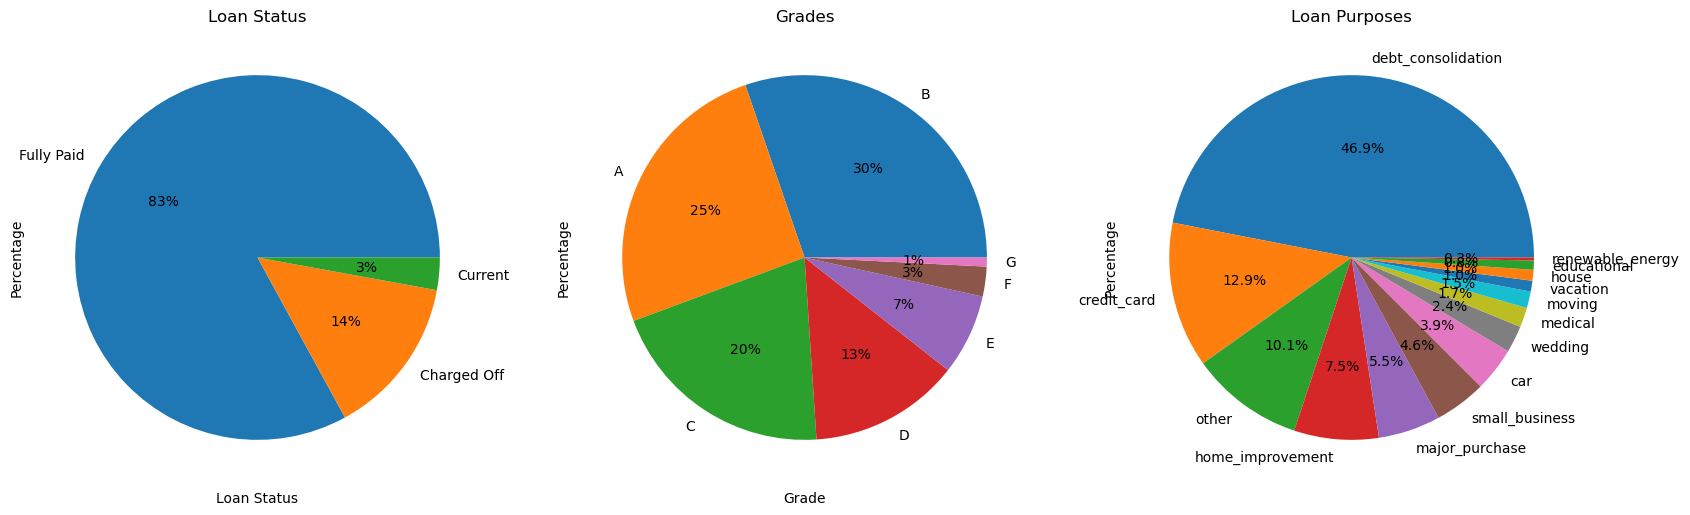

In [77]:
plt.figure(figsize=(20,8))
ax1 = plt.subplot(1,3,1)
df_loan['loan_status'].value_counts().plot.pie(autopct="%1.0f%%", ax = ax1)
plt.title('Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Percentage')
ax2 = plt.subplot(1,3,2)
df_loan['grade'].value_counts().plot.pie(autopct="%1.0f%%", ax = ax2)
plt.title('Grades')
plt.xlabel('Grade')
plt.ylabel('Percentage')
ax3 = plt.subplot(1,3,3)
df_loan['purpose'].value_counts().plot.pie( autopct='%1.1f%%', ax = ax3) 
plt.title('Loan Purposes')
plt.ylabel('Percentage')

plt.show()
plt.show()

This visualization can help us understand the proportion of loans that have been fully paid, charged off, or are currently in progress. We can see that the majority of loans have been fully paid.

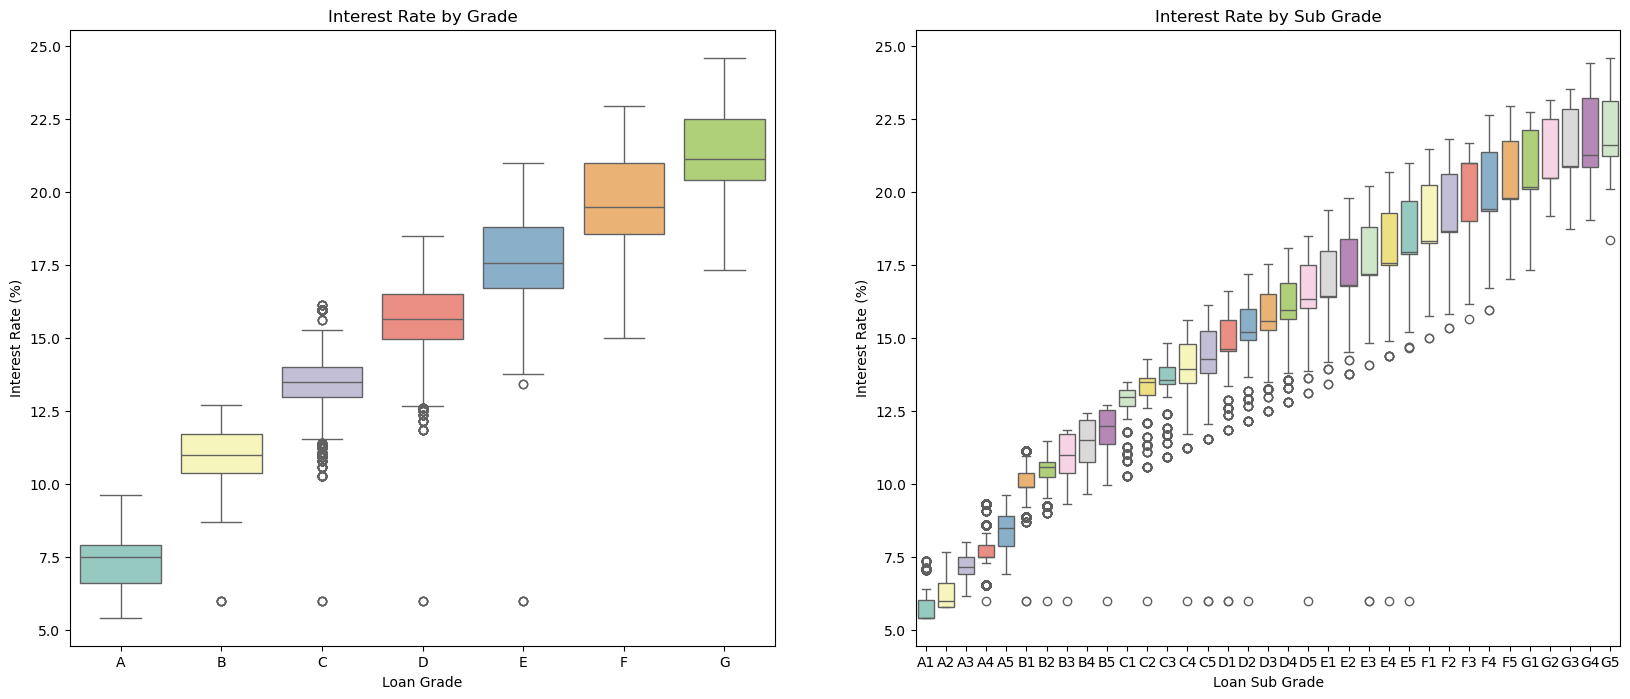

In [78]:
df_loan=df_loan.sort_values(by=['grade','sub_grade'],ascending=True)
plt.figure(figsize=(20, 8))
axgrade=plt.subplot(1,2,1)
sns.boxplot(data=df_loan, x='grade', y='int_rate', palette='Set3',ax=axgrade)
plt.title('Interest Rate by Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate (%)')
axsubgrade=plt.subplot(1,2,2)
sns.boxplot(data=df_loan, x='sub_grade', y='int_rate', palette='Set3',ax=axsubgrade)
plt.title('Interest Rate by Sub Grade')
plt.xlabel('Loan Sub Grade')
plt.ylabel('Interest Rate (%)')
plt.show()

**High-Risk Grades (E, F, G):**

Key Indicators:

High median interest rates, reflecting the high likelihood of default.

Wider IQR and more outliers, signaling a significant variability in risk levels.

Risk Profile:

These grades represent borrowers with poor credit histories or unstable incomes.

Lenders face a high risk of non-payment, which is offset by charging much higher interest rates.

This visualization can help us understand the relationship between loan grade and interest rates. We can see that higher grade loans tend to have lower interest rates. 

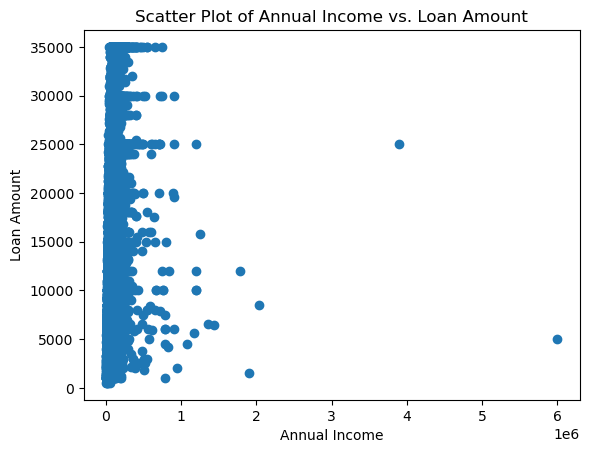

In [79]:
plt.scatter(df_loan['annual_inc'], df_loan['loan_amnt']) 
plt.xlabel('Annual Income') 
plt.ylabel('Loan Amount') 
plt.title('Scatter Plot of Annual Income vs. Loan Amount') 
plt.show()

**Weak Correlation:**

The plot suggests no strong relationship between annual income and loan amount. Borrowers with similar incomes might request vastly different loan amounts.

This lack of correlation implies that other factors (e.g., credit score, existing debt, or risk tolerance) are influencing loan amounts.

This visualization can help us understand the relationship between annual income and loan amount. We can see that there is a positive correlation between the two variables, indicating that individuals with higher incomes tend to receive larger loans.

In [80]:
df_loan[['loan_amnt', 'int_rate', 'dti', 'annual_inc', 'revol_bal', 'total_acc','funded_amnt','installment','out_prncp','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries']].corr()


,loan_amnt,int_rate,dti,annual_inc,revol_bal,total_acc,funded_amnt,installment,out_prncp,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries
loan_amnt,1.000000,0.309415,0.066439,0.271149,0.317597,0.256442,0.981578,0.930288,0.192937,0.886613,0.854243,0.852021,0.729726,0.044706,0.135446
int_rate,0.309415,1.000000,0.111162,0.053185,0.097100,-0.043570,0.312619,0.282703,0.134616,0.308268,0.303670,0.186882,0.529913,0.092591,0.122259
dti,0.066439,0.111162,1.000000,-0.122732,0.228743,0.229881,0.066283,0.054186,0.036095,0.064766,0.071647,0.041316,0.106071,-0.011781,0.024878
annual_inc,0.271149,0.053185,-0.122732,1.000000,0.279961,0.235771,0.266965,0.270874,0.033573,0.257980,0.247119,0.259571,0.185476,0.006243,0.021589
revol_bal,0.317597,0.097100,0.228743,0.279961,1.000000,0.313602,0.310392,0.312679,0.060388,0.293204,0.277543,0.281419,0.243000,0.003823,0.042091
total_acc,0.256442,-0.043570,0.229881,0.235771,0.313602,1.000000,0.250589,0.230824,0.031191,0.225077,0.219244,0.231242,0.147792,-0.024715,0.023281
funded_amnt,0.981578,0.312619,0.066283,0.266965,0.310392,0.250589,1.000000,0.956159,0.194941,0.903160,0.870799,0.870255,0.737469,0.046705,0.136284
installment,0.930288,0.282703,0.054186,0.270874,0.312679,0.230824,0.956159,1.000000,0.125082,0.856928,0.817416,0.850773,0.634725,0.056709,0.118152
out_prncp,0.192937,0.134616,0.036095,0.033573,0.060388,0.031191,0.194941,0.125082,1.000000,0.239367,0.246537,0.166519,0.383746,-0.004644,-0.018878
total_pymnt,0.886613,0.308268,0.064766,0.257980,0.293204,0.225077,0.903160,0.856928,0.239367,1.000000,0.970815,0.971472,0.828758,0.012981,0.023950


In [81]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
17,1069971,1304884,3600,3600,3600.0,36,6.03,109.57,A,A1,Duracell,10+ years,MORTGAGE,110000.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/15/11 > Payoff other le...,major_purchase,Holiday,067xx,CT,10.52,0,Aug-93,0,NaN,NaN,20,0,22836,16.0,42,f,0.0,0.0,3785.271965,3785.27,3600.0,185.27,0.0,0.0,0.0,May-13,583.45,NaN,May-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
19,1069742,1304855,9200,9200,9200.0,36,6.03,280.01,A,A1,Network Interpreting Service,6 years,RENT,77385.19,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,nan,debt_consolidation,lowerratemeanseasiertogetoutofdebt!,921xx,CA,9.86,0,Jan-01,0,NaN,NaN,8,0,7314,23.1,28,f,0.0,0.0,9460.000848,9460.00,9200.0,260.00,0.0,0.0,0.0,Jul-12,8061.10,NaN,Feb-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
44,1069469,1304526,6000,6000,6000.0,36,6.03,182.62,A,A1,"Stewart Enterprises, Inc.",10+ years,MORTGAGE,45600.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > Debt Consolidat...,debt_consolidation,Debt-Consolidation,700xx,LA,5.34,0,Nov-95,1,NaN,NaN,6,0,3378,32.5,28,f,0.0,0.0,6065.860000,6065.86,6000.0,65.86,0.0,0.0,0.0,Jul-12,15.01,NaN,Jun-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
48,1069287,1304171,10000,10000,10000.0,36,6.03,304.36,A,A1,Helicoil,10+ years,RENT,60000.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,nan,credit_card,Credit Card Loan,067xx,CT,12.74,0,Sep-92,1,NaN,NaN,11,0,14019,19.5,18,f,0.0,0.0,10282.705710,10282.71,10000.0,282.71,0.0,0.0,0.0,Jul-12,8762.05,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
83,1068967,1303403,4500,4500,4500.0,36,6.03,136.96,A,A1,CaseStack,4 years,RENT,53000.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,nan,major_purchase,Auto Loan,908xx,CA,4.44,0,Oct-00,0,NaN,NaN,7,0,8630,13.9,17,f,0.0,0.0,4930.555891,4930.56,4500.0,430.56,0.0,0.0,0.0,Jan-15,138.95,NaN,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


This visualization can help us understand the distribution of loan purposes in the dataset. We can see that the majority of loans are for credit card debt consolidation, followed by other purposes such as home improvement and small business loans.

In [82]:
# Define risk thresholds for filtering risky loans
high_risk_criteria = (
    (df_loan['grade'].isin(['E', 'F', 'G'])) |  # Low grades
    (df_loan['int_rate'] > 18) |               # High interest rates (>18%)
    (df_loan['dti'] > 30)                      # High Debt-to-Income ratio (>30%)
)

# Filter risky loans
risky_loans = df_loan[high_risk_criteria]

In [83]:
# Filter risky loans
risky_loans = df_loan[high_risk_criteria]

# Analyze the proportion of risky loans and their loan statuses
risky_loans_status = risky_loans['loan_status'].value_counts(normalize=True) * 100

# Summary statistics for risky loans
risky_loans_summary = risky_loans.describe()

risky_loans.shape, risky_loans_status, risky_loans_summary

((4373, 57),
 loan_status
 Fully Paid     66.293163
 Charged Off    27.006632
 Current         6.700206
 Name: proportion, dtype: float64,
                  id     member_id     loan_amnt   funded_amnt  \
 count  4.373000e+03  4.373000e+03   4373.000000   4373.000000   
 mean   7.213718e+05  9.000499e+05  16794.889092  16213.754859   
 std    1.994388e+05  2.465782e+05   9071.838740   8681.654859   
 min    6.916800e+04  8.699900e+04   1000.000000   1000.000000   
 25%    5.753530e+05  7.393160e+05  10000.000000   9750.000000   
 50%    7.127090e+05  9.057270e+05  15650.000000  15000.000000   
 75%    8.566800e+05  1.068116e+06  24000.000000  22000.000000   
 max    1.072053e+06  1.306957e+06  35000.000000  35000.000000   
 
        funded_amnt_inv         term     int_rate  installment     annual_inc  \
 count      4373.000000  4373.000000  4373.000000  4373.000000    4373.000000   
 mean      15435.411443    53.562314    18.487322   456.945495   80808.424825   
 std        8648.41333

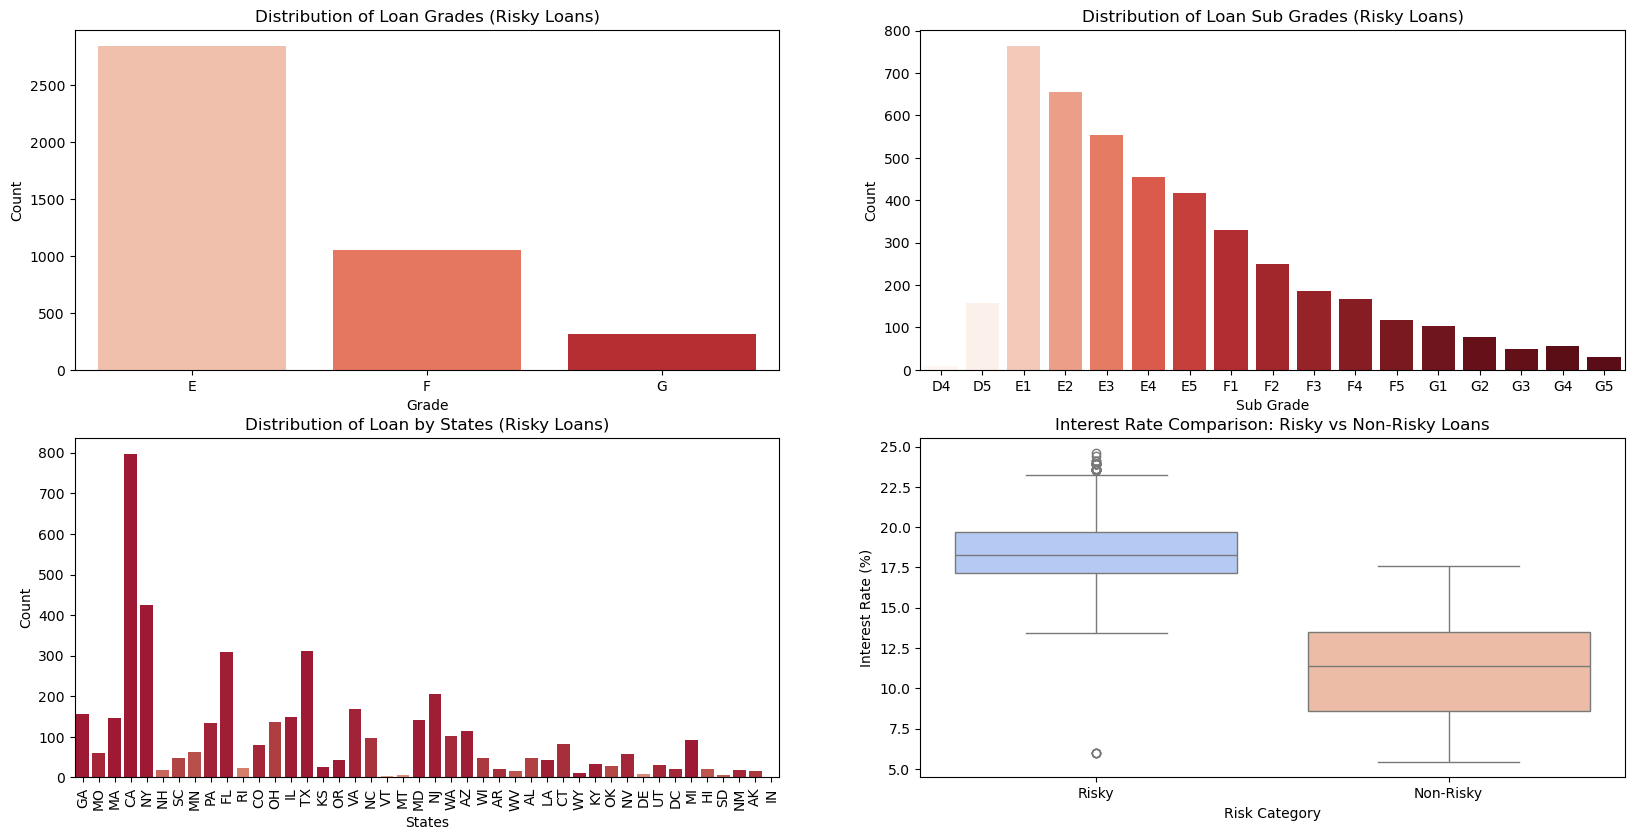

In [84]:
#Distribution of Loan Grades (Risky Loans)
plt.figure(figsize=(20, 15))
grdRisky= plt.subplot(3,2,1)
sns.countplot(data=risky_loans, x='grade', order=['E', 'F', 'G'], palette='Reds',ax=grdRisky)
plt.title('Distribution of Loan Grades (Risky Loans)')
plt.xlabel('Grade')
plt.ylabel('Count')

grdRisky= plt.subplot(3,2,2)
sns.countplot(data=risky_loans, x='sub_grade', order=sorted(risky_loans['sub_grade']), palette='Reds',ax=grdRisky)
plt.title('Distribution of Loan Sub Grades (Risky Loans)')
plt.xlabel('Sub Grade')
plt.ylabel('Count')

grdRisky= plt.subplot(3,2,3)
sns.countplot(data=risky_loans, x='addr_state', order=risky_loans['addr_state'], palette='coolwarm',ax=grdRisky)
plt.title('Distribution of Loan by States (Risky Loans)')
plt.xlabel('States')
plt.ylabel('Count')
plt.xticks(rotation=90)

#Interest Rate Comparison
risky_loans['risk_category'] = 'Risky'
non_risky_loans = df_loan[~high_risk_criteria]
non_risky_loans['risk_category'] = 'Non-Risky'
comparison_data = pd.concat([risky_loans, non_risky_loans])
intrRisk= plt.subplot(3,2,4)
sns.boxplot(data=comparison_data, x='risk_category', y='int_rate', palette='coolwarm',ax=intrRisk)
plt.title('Interest Rate Comparison: Risky vs Non-Risky Loans')
plt.xlabel('Risk Category')
plt.ylabel('Interest Rate (%)')

plt.show()



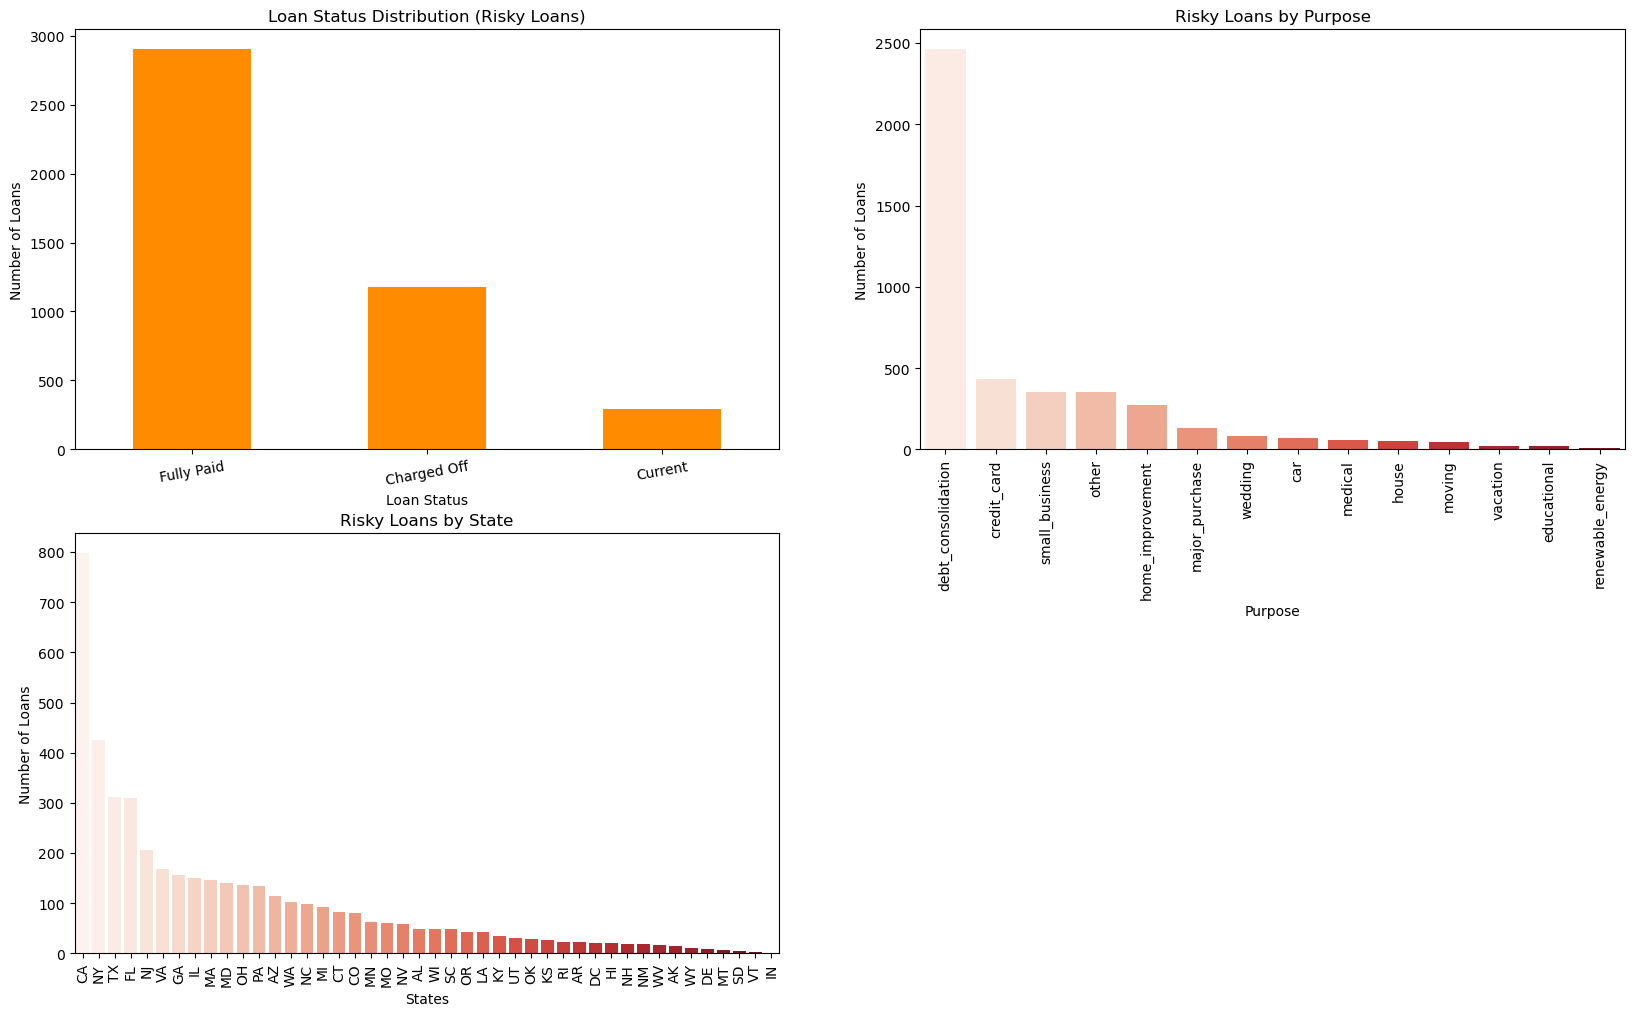

In [85]:
# Default Trends in Risky Loans
plt.figure(figsize=(20, 12))
risky_loan_status_counts = risky_loans['loan_status'].value_counts()
ax0=plt.subplot(2,2,1)
risky_loan_status_counts.plot(kind='bar', color='darkorange', ax=ax0)
plt.title('Loan Status Distribution (Risky Loans)')
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')
plt.xticks(rotation=10)
# Risky Loans by Purpose

risky_loan_purpose_counts = risky_loans['purpose'].value_counts()
ax1=plt.subplot(2,2,2)
sns.barplot(y=risky_loan_purpose_counts.values, x=risky_loan_purpose_counts.index, palette='Reds',ax=ax1)
plt.title('Risky Loans by Purpose')
plt.ylabel('Number of Loans')
plt.xlabel('Purpose')
plt.xticks(rotation=90)

risky_loan_purpose_counts = risky_loans['addr_state'].value_counts()
ax1=plt.subplot(2,2,3)
sns.barplot(y=risky_loan_purpose_counts.values, x=risky_loan_purpose_counts.index, palette='Reds',ax=ax1)
plt.title('Risky Loans by State')
plt.ylabel('Number of Loans')
plt.xlabel('States')
plt.xticks(rotation=90)
plt.show()




In [86]:
categorical = df_loan.select_dtypes(include=['int64', 'float64']).columns

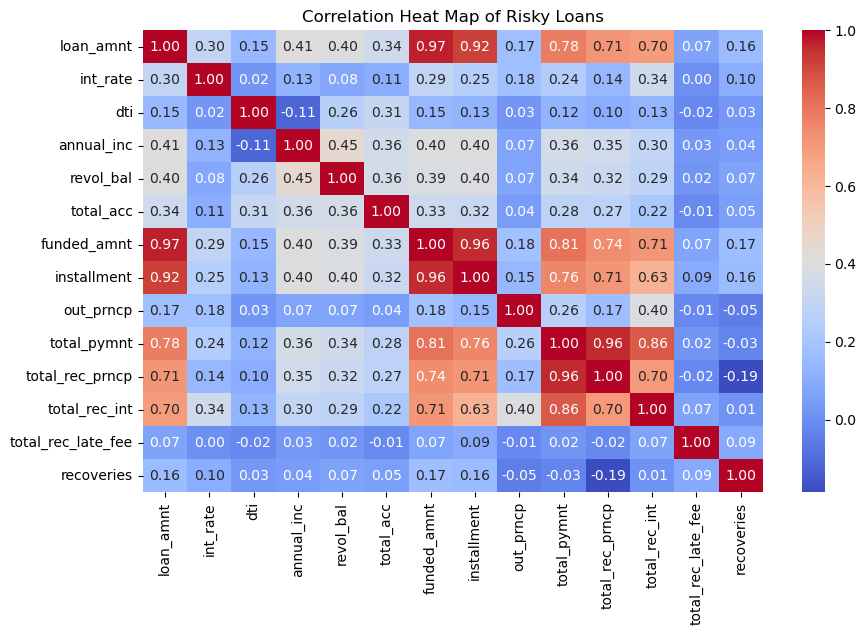

In [87]:
# Correlation Heat Map (Numerical Features)
plt.figure(figsize=(10, 6))
numerical_features =['loan_amnt', 'int_rate', 'dti', 'annual_inc', 'revol_bal', 'total_acc','funded_amnt','installment','out_prncp','total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries']
#['loan_amnt', 'int_rate', 'dti', 'annual_inc', 'revol_bal', 'total_acc','funded_amnt','installment']
correlation_matrix = risky_loans[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heat Map of Risky Loans')
plt.show()



**Debt-to-Income Ratio (DTI) and Risk:**

Negative correlation between DTI and annual income (-0.11): 

As income increases, the DTI ratio tends to decrease. A high DTI is a strong indicator of higher risk because it implies the borrower is already carrying a significant debt load relative to their income, which increases the likelihood of loan default.

The weak positive correlation with loan amount (0.15) and revolving balance (0.26) also shows that higher loan amounts and higher balances tend to go hand-in-hand with a higher DTI, which is a risk factor for default.


**Correlation between loan_amnt and other variables:**

The loan amount (loan_amnt) has a moderate positive correlation with the interest rate (int_rate) at 0.30 and a slightly higher positive correlation with annual income (annual_inc) at 0.41.
It also has moderate positive correlations with revolving balance (revol_bal) and total accounts (total_acc).
Interest rate correlations:

The interest rate (int_rate) has a low positive correlation with loan amount (loan_amnt), but it has very low correlations with other variables like annual income (annual_inc) and revolving balance (revol_bal).


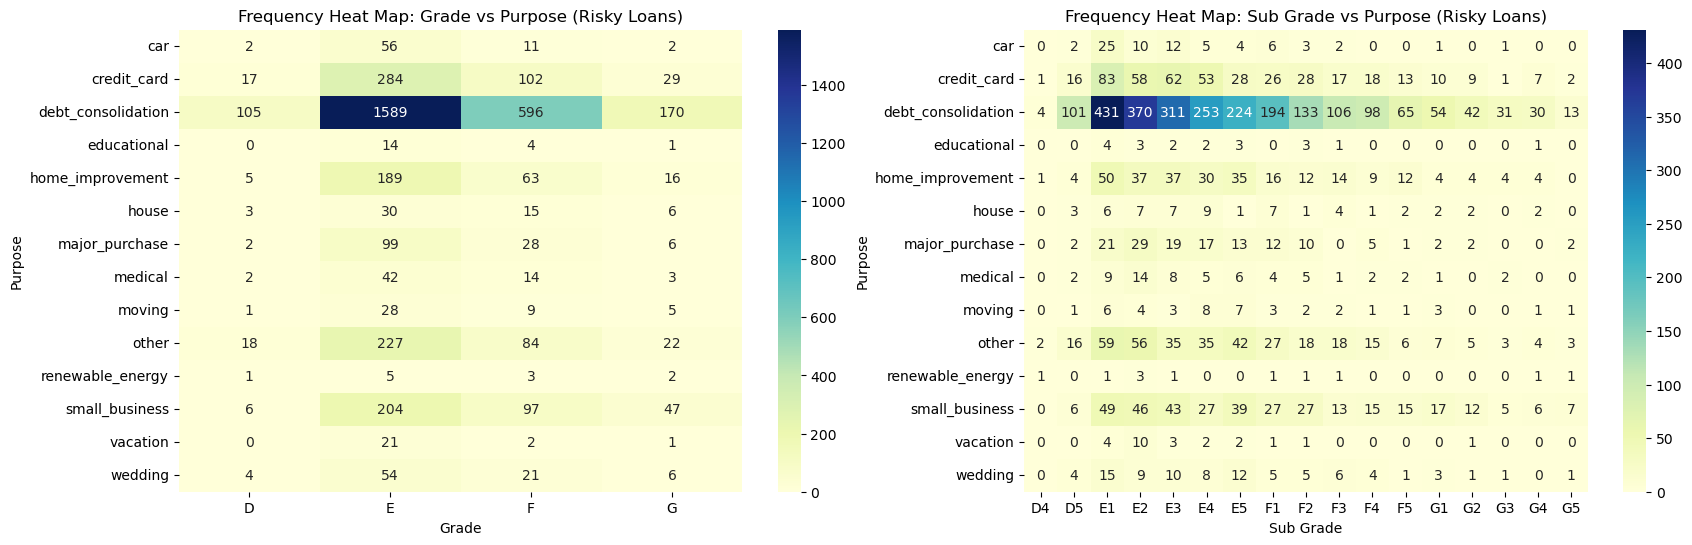

In [88]:
# 6. Frequency Heat Map (Grade vs Purpose)
plt.figure(figsize=(20, 6))
grade_purpose_pivot = risky_loans.pivot_table(index='purpose', columns='grade', aggfunc='size', fill_value=0)
axGrdHM=plt.subplot(1,2,1)
sns.heatmap(grade_purpose_pivot, annot=True, fmt='d', cmap='YlGnBu',ax=axGrdHM)
plt.title('Frequency Heat Map: Grade vs Purpose (Risky Loans)')
plt.xlabel('Grade')
plt.ylabel('Purpose')
axSubGrdHM=plt.subplot(1,2,2)
grade_purpose_pivot = risky_loans.pivot_table(index='purpose', columns='sub_grade', aggfunc='size', fill_value=0)
sns.heatmap(grade_purpose_pivot, annot=True, fmt='d', cmap='YlGnBu',ax=axSubGrdHM)
plt.title('Frequency Heat Map: Sub Grade vs Purpose (Risky Loans)')
plt.xlabel('Sub Grade')
plt.ylabel('Purpose')
plt.show()

**Risk Implication:**

Debt consolidation loans are often used by individuals facing financial stress or managing existing debt. Therefore, loan grades D and E, with their high frequencies for debt consolidation, may reflect higher financial distress and a higher risk of default.

Credit card loans also seem to be somewhat common in these grades, further suggesting that borrowers in these grades may have challenges managing credit and could be at risk.

**Risk Insights:**
Debt consolidation is strongly associated with higher-risk borrowers (grades D, E, F, G and sub-grades D4, D5). Borrowers in these groups are likely facing financial struggles, making them higher-risk for loan defaults.

Home improvement and small business loans, while somewhat common across sub-grades, show lower frequencies in riskier grades. These loan purposes may still indicate a level of financial planning or stability, but they are less prominent in the high-risk groups.

Credit card loans show a mixed frequency across grades and sub-grades. This could suggest that some borrowers in lower grades are using loans for credit-related needs, which can indicate over-reliance on credit, adding to the default risk.

In [89]:
# # FICO Score vs Sub-Grades
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=df_loan, x='sub_grade', y='last_fico_range_high', palette='coolwarm', order=sorted(df_loan['sub_grade'].unique()))
# plt.title('FICO Score Distribution by Sub-Grade')
# plt.xlabel('Sub-Grade')
# plt.ylabel('FICO Range (Low)')
# plt.xticks(rotation=45)
# plt.show()

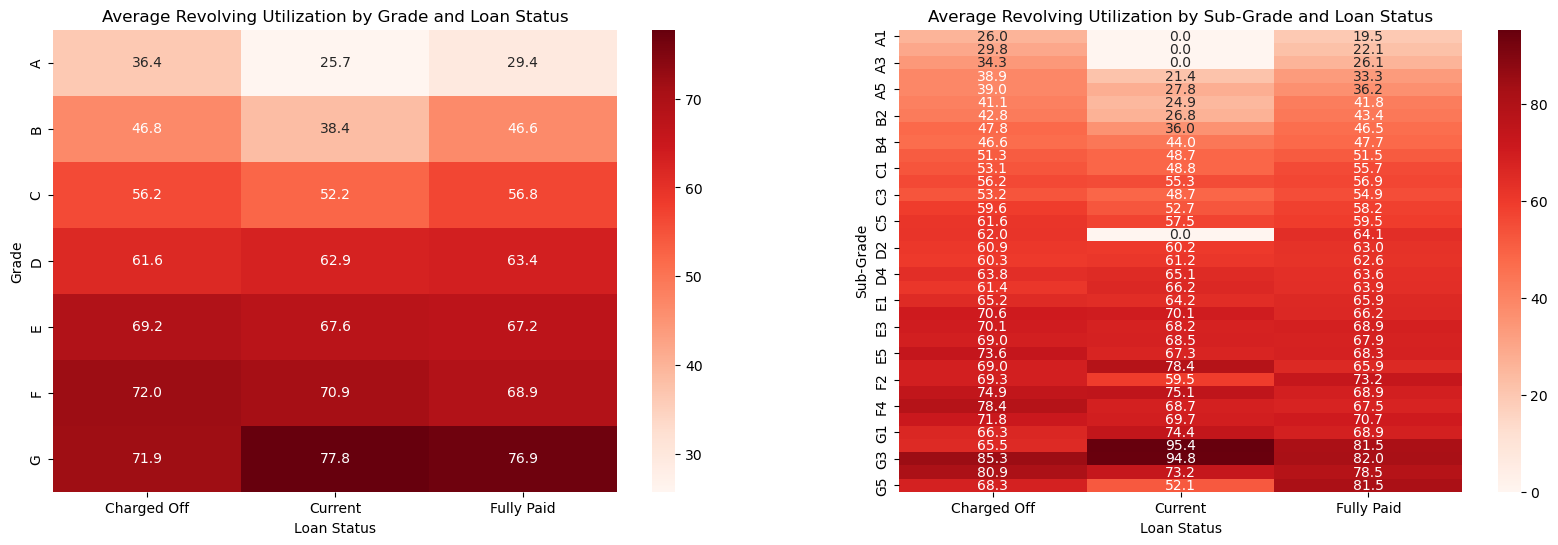

In [90]:
# Revolving Utilization Heatmap
plt.figure(figsize=(20, 6))
axhmgrad=plt.subplot(1,2,1)
sns.heatmap(df_loan.pivot_table(index='grade', columns='loan_status', values='revol_util', aggfunc='mean', fill_value=0),
            annot=True, fmt='.1f', cmap='Reds', ax=axhmgrad)
plt.title('Average Revolving Utilization by Grade and Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Grade')

axhmsubgrad=plt.subplot(1,2,2)
sns.heatmap(df_loan.pivot_table(index='sub_grade', columns='loan_status', values='revol_util', aggfunc='mean', fill_value=0),
            annot=True, fmt='.1f', cmap='Reds', ax=axhmsubgrad)
plt.title('Average Revolving Utilization by Sub-Grade and Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Sub-Grade')
plt.show()



## TREND

**As the loan grade decreases (from A to G), the revolving utilization increases for each loan status category.**

There is variation within each grade and sub-grade, with some sub-grades showing significantly higher utilization rates, especially in the "Charged Off" and "Fully Paid" categories.


In [91]:
categorical = df_loan.select_dtypes(include=['int64', 'float64']).columns

In [92]:
# for column in categorical:
#     title = "Plot of " + column
#     plt.scatter(df_loan.index, df_loan[column])
#     plt.title(title)
#     plt.show()


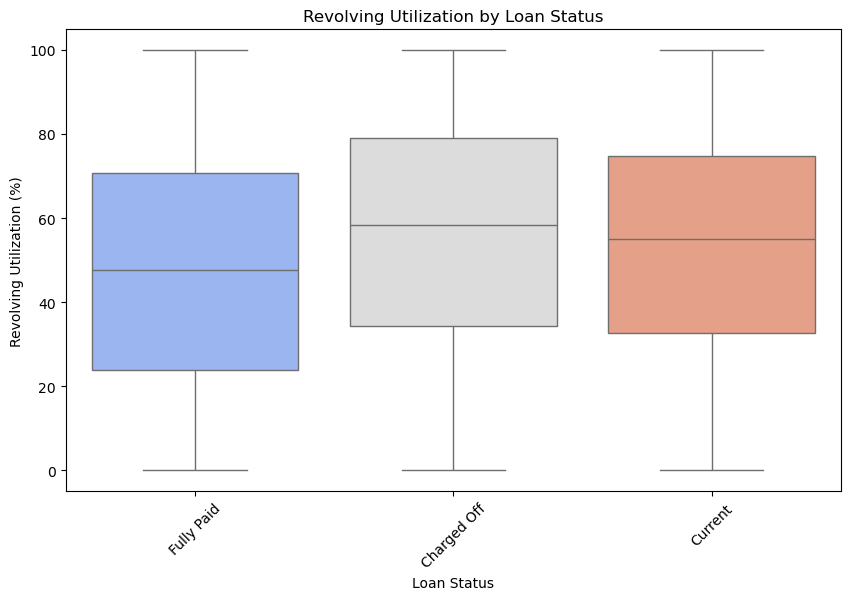

In [93]:
# Box Plot: Loan Status vs Revolving Utilization
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_loan, x='loan_status', y='revol_util', palette='coolwarm')
plt.title('Revolving Utilization by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Revolving Utilization (%)')
plt.xticks(rotation=45)
plt.show()



**Fully Paid Loans:**

Median revolving utilization is lower compared to the other statuses.

Indicates that borrowers who fully repay loans tend to have more conservative credit usage.

The interquartile range (IQR) shows a narrower spread, suggesting more consistent credit behavior.
Charged Off Loans:

**Charged Off Loans:**

Median utilization is higher than Fully Paid loans, suggesting riskier credit behavior.

The IQR is wider, indicating a higher variability in credit usage among borrowers whose loans are charged off.

Borrowers in this group often have high utilization, hinting at financial stress or over-leverage.
Current Loans:

**Current Loans:**

Median utilization is slightly below Charged Off loans but above Fully Paid loans.

Reflects borrowers who are actively paying loans but may have higher revolving credit balances.

IQR suggests a moderate spread, showing variability in usage but less than Charged Off loans.



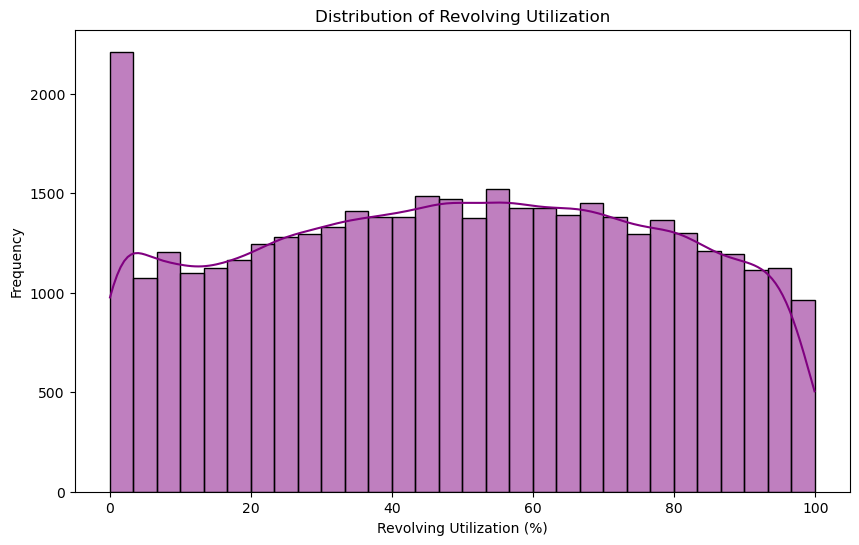

In [94]:
# Histogram: Distribution of Revolving Utilization
plt.figure(figsize=(10, 6))
sns.histplot(data=df_loan, x='revol_util', bins=30, kde=True, color='purple')
plt.title('Distribution of Revolving Utilization')
plt.xlabel('Revolving Utilization (%)')
plt.ylabel('Frequency')
plt.show()

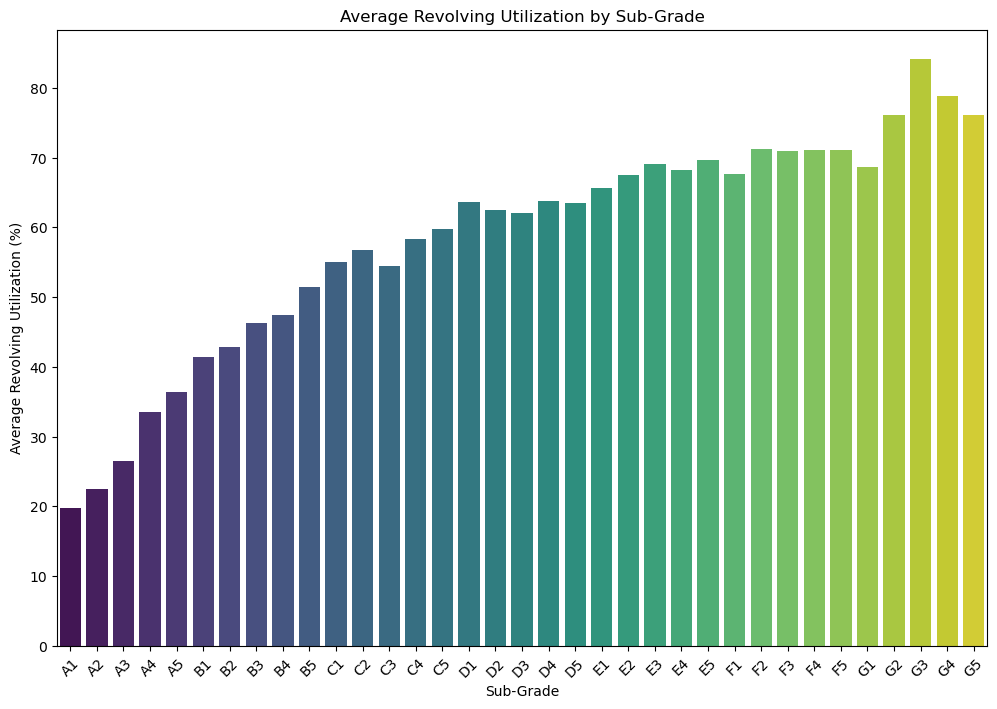

In [95]:
# Sub-Grade vs Revolving Utilization: Bar Plot
plt.figure(figsize=(12, 8))
average_revol_util_by_sub_grade = df_loan.groupby('sub_grade')['revol_util'].mean().sort_index()
sns.barplot(x=average_revol_util_by_sub_grade.index, y=average_revol_util_by_sub_grade.values, palette='viridis')
plt.title('Average Revolving Utilization by Sub-Grade')
plt.xlabel('Sub-Grade')
plt.ylabel('Average Revolving Utilization (%)')
plt.xticks(rotation=45)
plt.show()



Insights:
**Risk Assessment:**

Borrowers with sub-grades in the F and G categories represent high-risk groups due to their high revolving utilization. These borrowers are more likely to default or struggle with repayments.

**Borrower Behavior by Sub-Grade:**

Borrowers with lower sub-grades (e.g., A and B) tend to use credit sparingly, making them safer for lenders.

Higher sub-grade borrowers (E, F, G) exhibit risky behavior with higher utilization, potentially signaling over-leverage or poor financial management.


**Custom Lending Criteria:**

Offer better terms (e.g., lower interest rates) to A and B borrowers to encourage safe credit usage.

Consider stricter repayment schedules or additional guarantees for F and G borrowers.

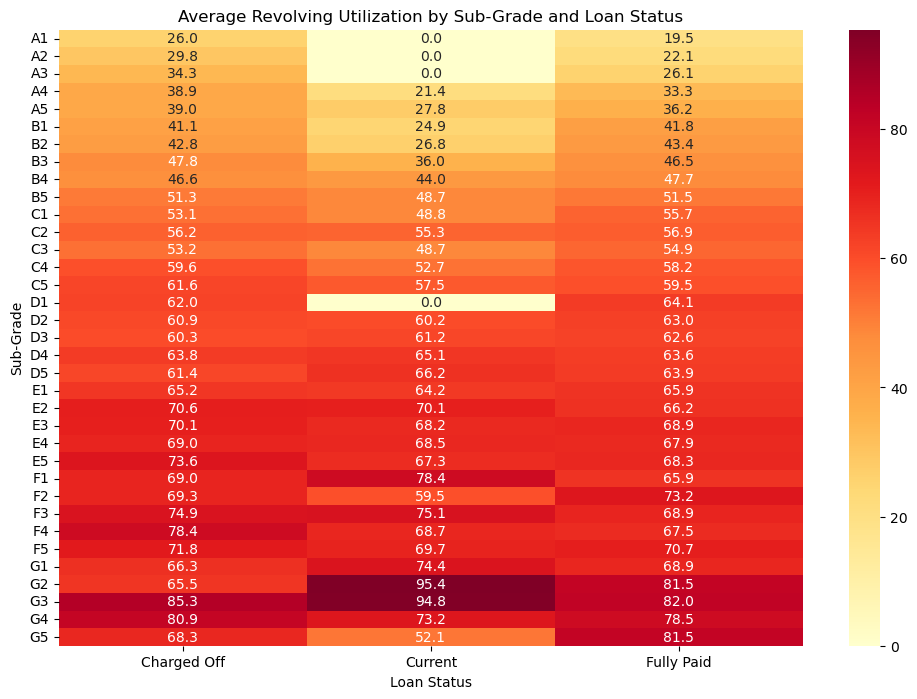

In [96]:
# Heatmap: Sub-Grade vs Loan Status (Revolving Utilization)
plt.figure(figsize=(12, 8))
sub_grade_status_pivot = df_loan.pivot_table(
    index='sub_grade', 
    columns='loan_status', 
    values='revol_util', 
    aggfunc='mean', 
    fill_value=0
)
sns.heatmap(sub_grade_status_pivot, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Average Revolving Utilization by Sub-Grade and Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Sub-Grade')
plt.show()

**Risk Differentiation:**

Sub-grades F and G consistently display high utilization across all loan statuses, indicating they are the riskiest borrowers regardless of their loan outcome.

**Loan Status Analysis:**

Charged Off loans have significantly higher utilization compared to fully paid loans across all sub-grades, confirming that revolving utilization is a key risk indicator for defaults.

Current loans are intermediate, showing higher utilization than fully paid loans but lower than charged off loans, reflecting their ongoing risk exposure.
Credit Behavior by Sub-Grade:

Lower sub-grades (A and B categories) demonstrate strong financial discipline, with consistently low utilization, even for charged-off loans.
Borrowers in sub-grades G2, G3, and G4 are outliers with dangerously high utilization, particularly for charged-off and current loans.

<Figure size 1200x800 with 0 Axes>

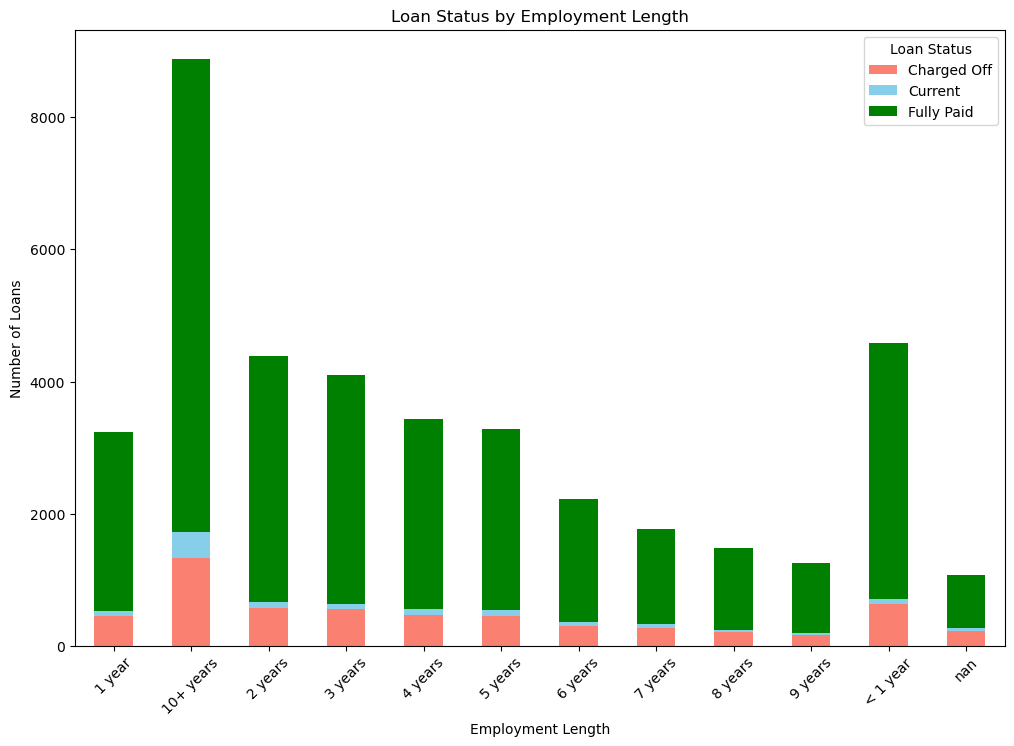

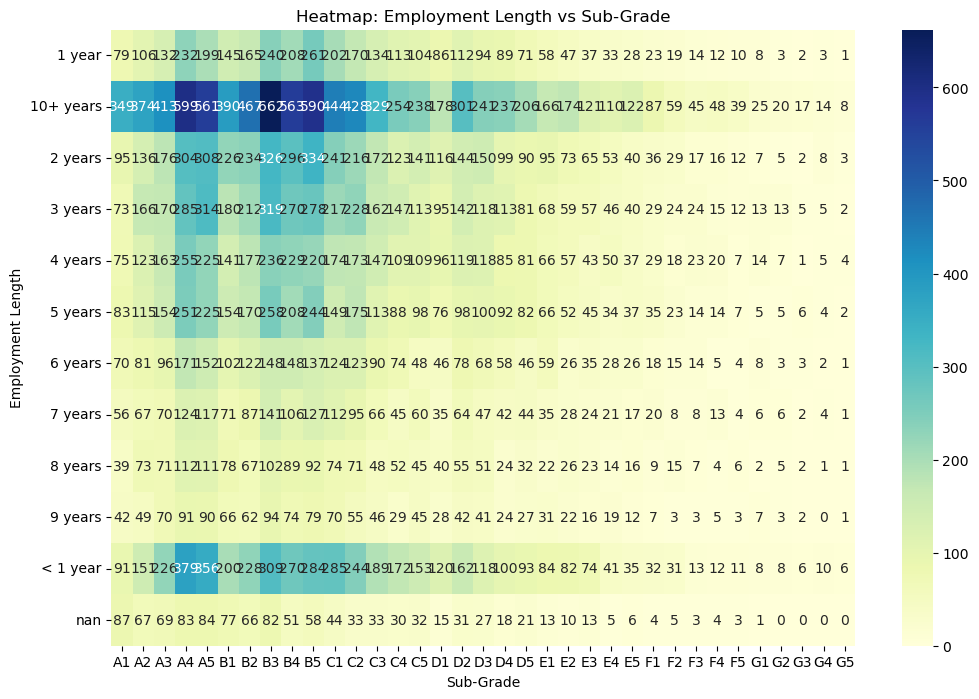

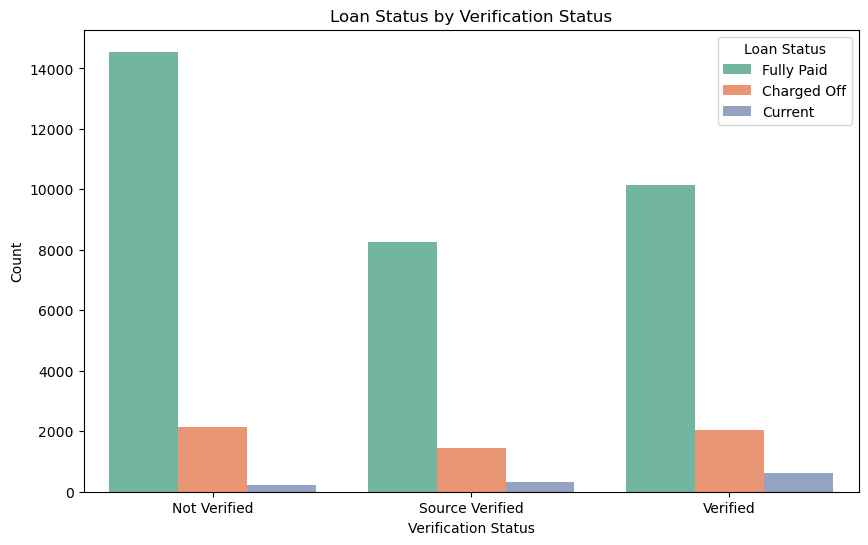

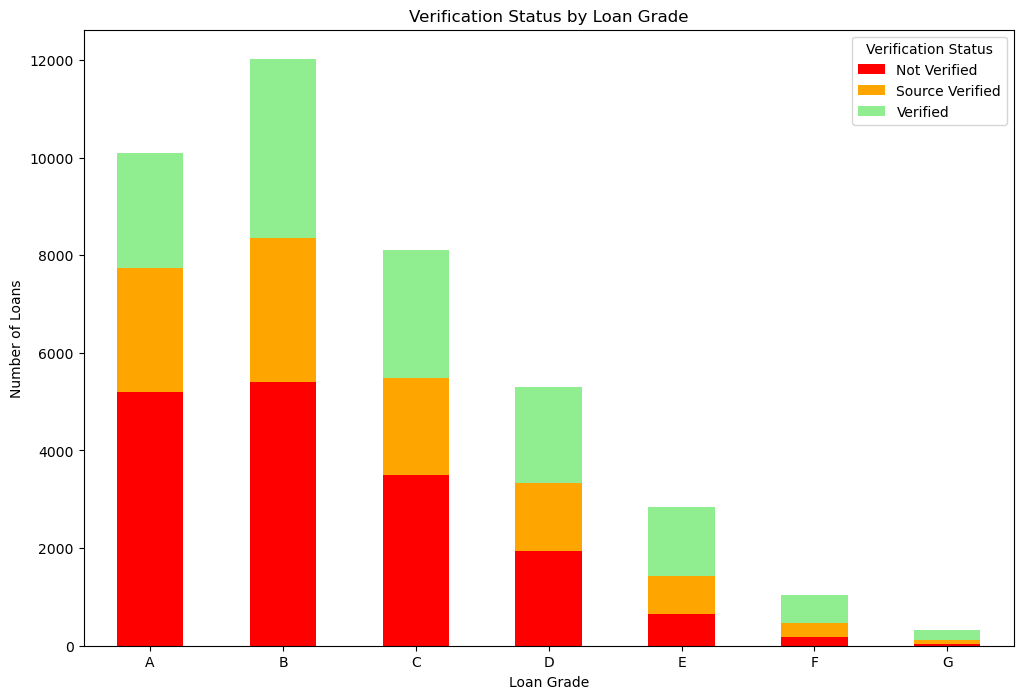

In [97]:
# Bar Plot: Loan Status by Employment Length
plt.figure(figsize=(12, 8))
emp_length_status = df_loan.groupby(['emp_length', 'loan_status']).size().unstack()
emp_length_status.plot(kind='bar', stacked=True, color=['salmon','skyblue', 'green'], figsize=(12, 8))
plt.title('Loan Status by Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status')
plt.xticks(rotation=45)
plt.show()

# Heatmap: Employment Length vs Sub-Grade
plt.figure(figsize=(12, 8))
emp_length_sub_grade_pivot = df_loan.pivot_table(
    index='emp_length', 
    columns='sub_grade', 
    aggfunc='size', 
    fill_value=0
)
sns.heatmap(emp_length_sub_grade_pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap: Employment Length vs Sub-Grade')
plt.xlabel('Sub-Grade')
plt.ylabel('Employment Length')
plt.show()

# Bar Plot: Loan Status by Verification Status
plt.figure(figsize=(10, 6))
sns.countplot(data=df_loan, x='verification_status', hue='loan_status', palette='Set2')
plt.title('Loan Status by Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

# Stacked Bar Chart: Verification Status by Loan Grade
verification_grade = df_loan.groupby(['grade', 'verification_status']).size().unstack()
verification_grade.plot(kind='bar', stacked=True, color=['red', 'orange', 'lightgreen'], figsize=(12, 8))
plt.title('Verification Status by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Number of Loans')
plt.legend(title='Verification Status')
plt.xticks(rotation=0)
plt.show()

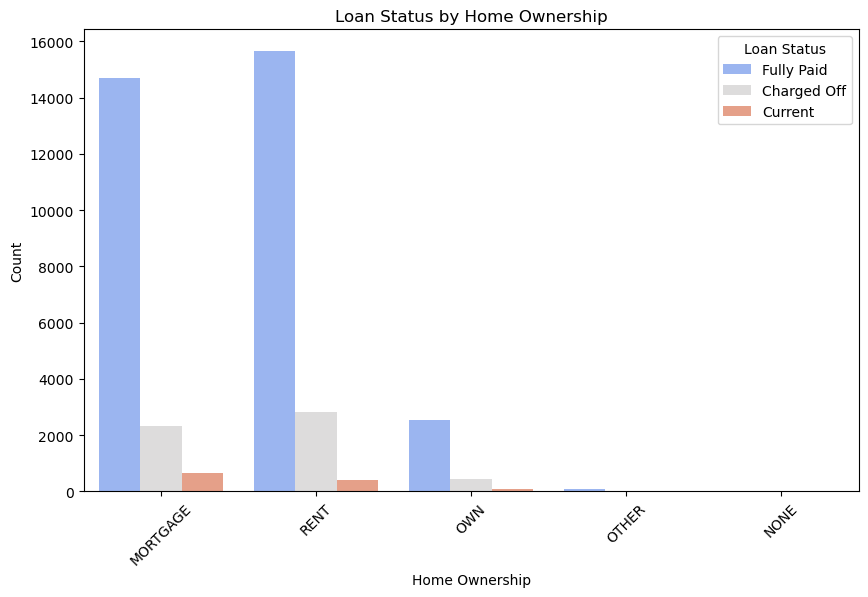

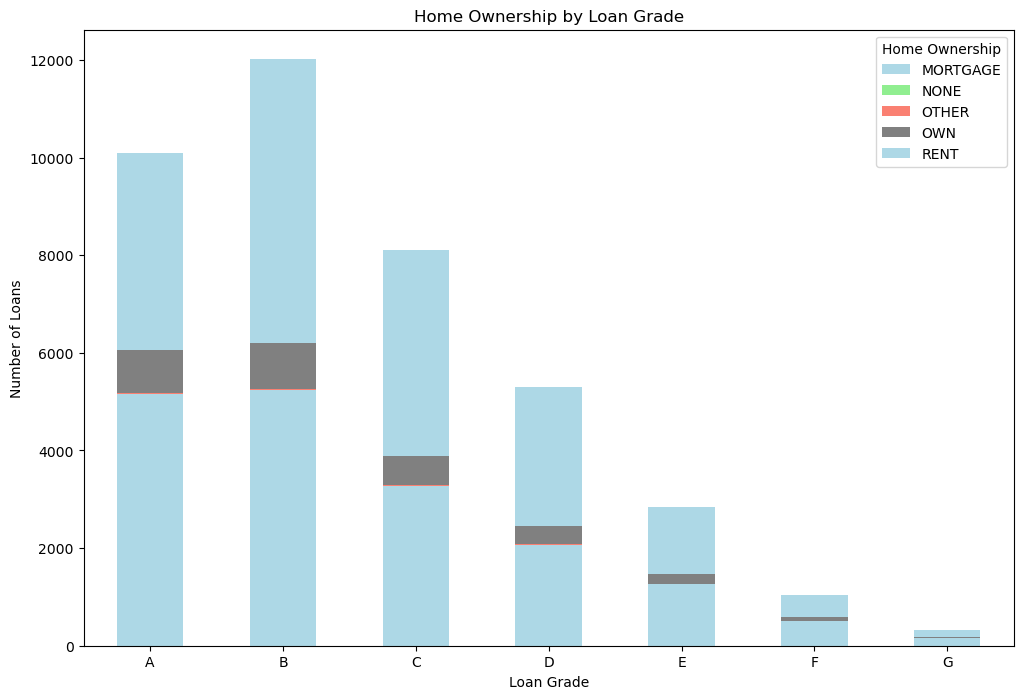

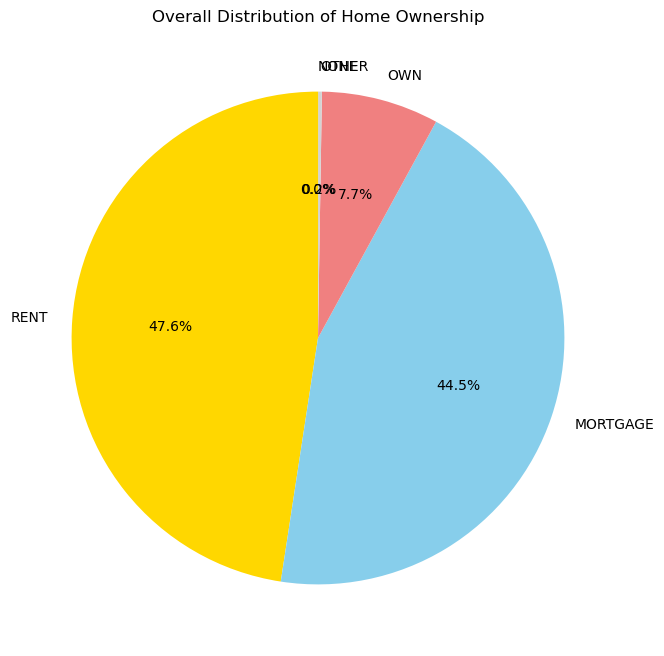

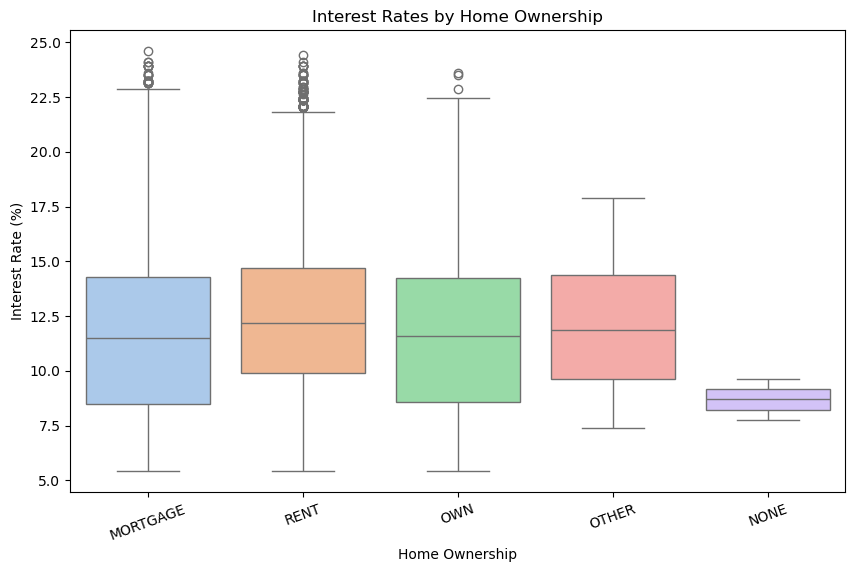

In [98]:
# Bar Plot: Loan Status by Home Ownership
plt.figure(figsize=(10, 6))
sns.countplot(data=df_loan, x='home_ownership', hue='loan_status', palette='coolwarm')
plt.title('Loan Status by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.xticks(rotation=45)
plt.show()

# Stacked Bar Chart: Home Ownership by Loan Grade
home_ownership_grade = df_loan.groupby(['grade', 'home_ownership']).size().unstack()
home_ownership_grade.plot(kind='bar', stacked=True, figsize=(12, 8), color=['lightblue', 'lightgreen', 'salmon', 'gray'])
plt.title('Home Ownership by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Number of Loans')
plt.legend(title='Home Ownership')
plt.xticks(rotation=0)
plt.show()

# Pie Chart: Overall Distribution of Home Ownership
plt.figure(figsize=(8, 8))
home_ownership_counts = df_loan['home_ownership'].value_counts()
home_ownership_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold', 'skyblue', 'lightcoral', 'lightgray'])
plt.title('Overall Distribution of Home Ownership')
plt.xticks(rotation=90)
plt.ylabel('')
plt.show()

# Box Plot: Interest Rates by Home Ownership
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_loan, x='home_ownership', y='int_rate', palette='pastel')
plt.title('Interest Rates by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Interest Rate (%)')
plt.xticks(rotation=20)
plt.show()

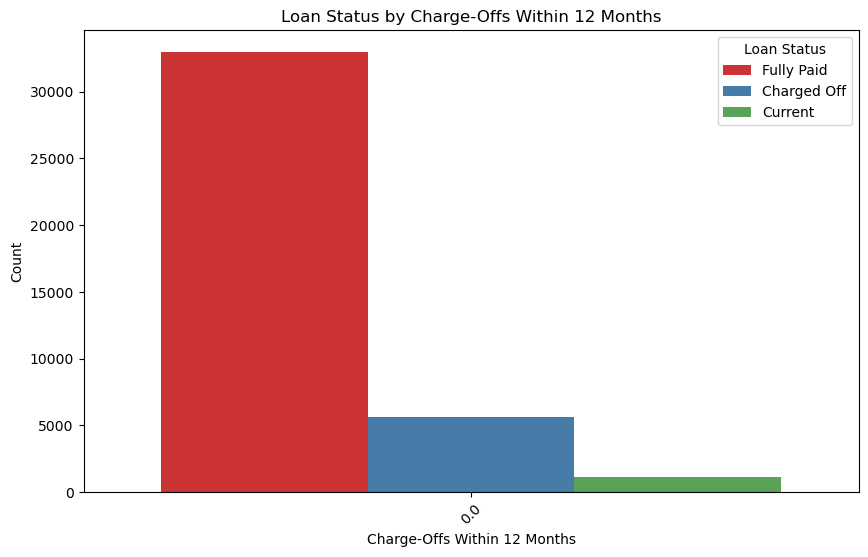

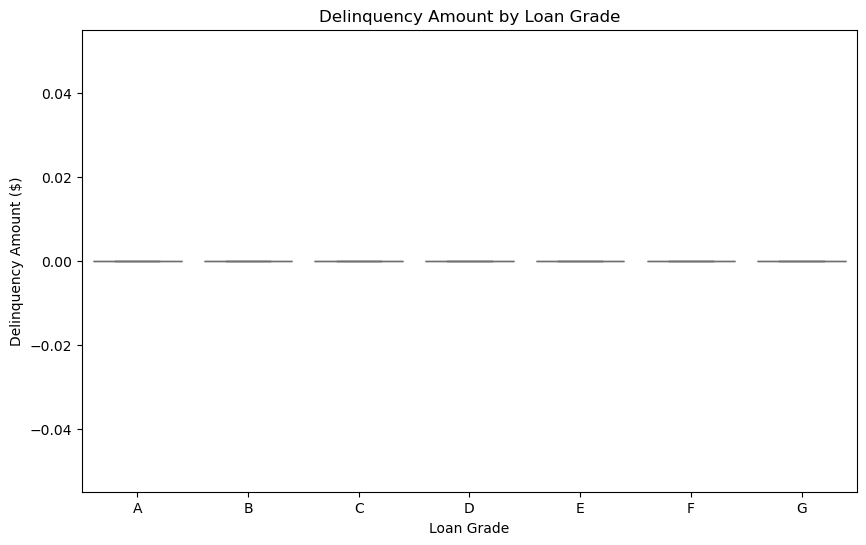

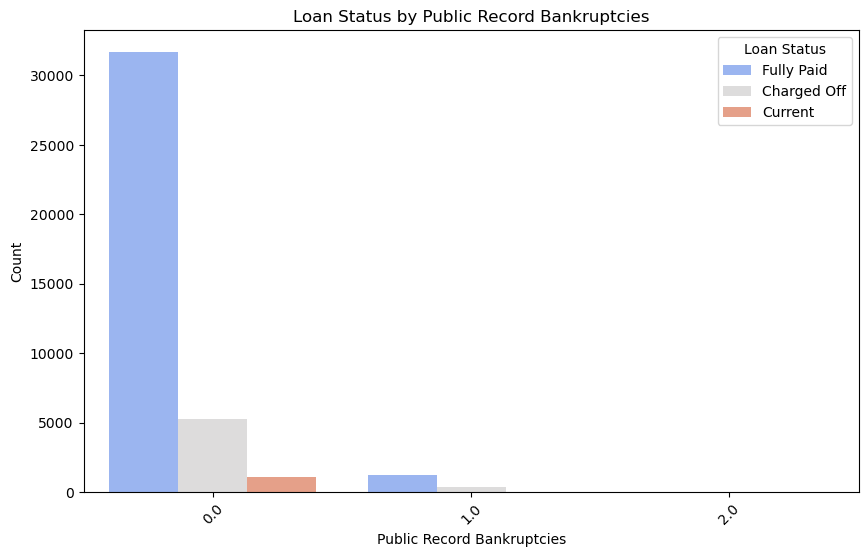

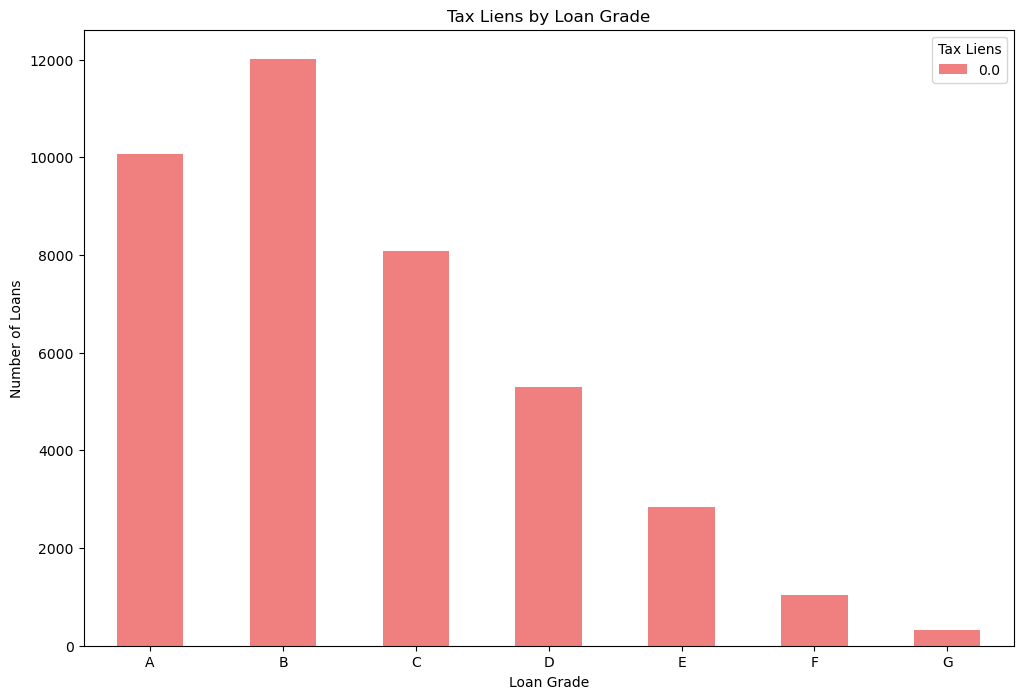

In [99]:
 #Bar Plot: Loan Status by Charge-Offs Within 12 Months
plt.figure(figsize=(10, 6))
sns.countplot(data=df_loan, x='chargeoff_within_12_mths', hue='loan_status', palette='Set1')
plt.title('Loan Status by Charge-Offs Within 12 Months')
plt.xlabel('Charge-Offs Within 12 Months')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.xticks(rotation=45)
plt.show()

# Box Plot: Delinquency Amount by Loan Grade
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_loan, x='grade', y='delinq_amnt', palette='pastel')
plt.title('Delinquency Amount by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Delinquency Amount ($)')
plt.show()

# Bar Plot: Loan Status by Public Record Bankruptcies
plt.figure(figsize=(10, 6))
sns.countplot(data=df_loan, x='pub_rec_bankruptcies', hue='loan_status', palette='coolwarm')
plt.title('Loan Status by Public Record Bankruptcies')
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.xticks(rotation=45)
plt.show()

# Stacked Bar Chart: Tax Liens by Loan Grade
tax_liens_grade = df_loan.groupby(['grade', 'tax_liens']).size().unstack()
tax_liens_grade.plot(kind='bar', stacked=True, figsize=(12, 8), color=['lightcoral', 'lightblue', 'gold'])
plt.title('Tax Liens by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Number of Loans')
plt.legend(title='Tax Liens')
plt.xticks(rotation=0)
plt.show()

In [100]:
# df_loan[['total_rec_prncp', 'total_rec_int']].plot(kind='bar', stacked=True, figsize=(10, 6))
# plt.title('Distribution of Loan Repayments (Principal vs Interest)')
# plt.ylabel('Amount')
# plt.show()

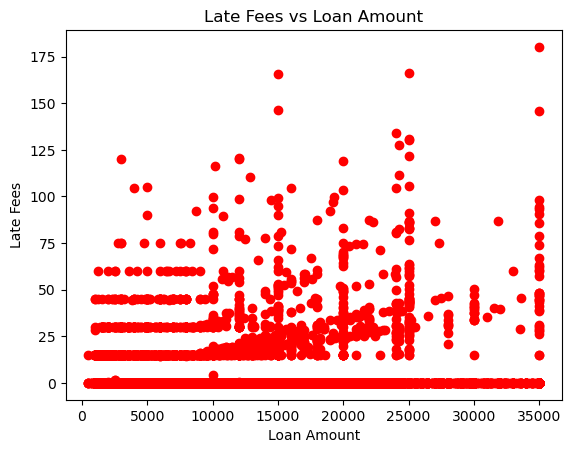

In [101]:
plt.scatter(df_loan['loan_amnt'], df_loan['total_rec_late_fee'], color='red')
plt.title('Late Fees vs Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Late Fees')
plt.show()


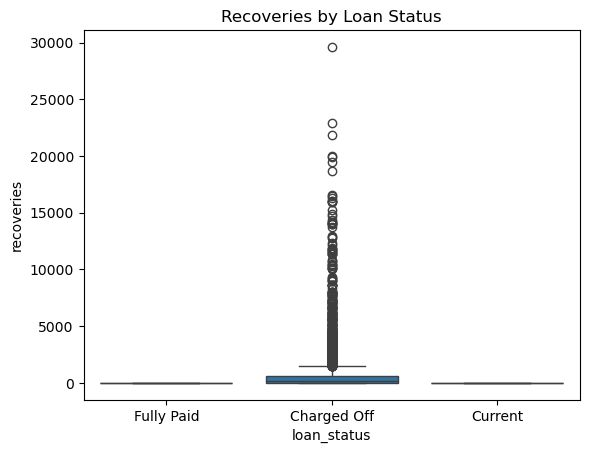

In [102]:
sns.boxplot(x='loan_status', y='recoveries', data=df_loan)
plt.title('Recoveries by Loan Status')
plt.show()

In [103]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
17,1069971,1304884,3600,3600,3600.0,36,6.03,109.57,A,A1,Duracell,10+ years,MORTGAGE,110000.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/15/11 > Payoff other le...,major_purchase,Holiday,067xx,CT,10.52,0,Aug-93,0,NaN,NaN,20,0,22836,16.0,42,f,0.0,0.0,3785.271965,3785.27,3600.0,185.27,0.0,0.0,0.0,May-13,583.45,NaN,May-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
19,1069742,1304855,9200,9200,9200.0,36,6.03,280.01,A,A1,Network Interpreting Service,6 years,RENT,77385.19,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,nan,debt_consolidation,lowerratemeanseasiertogetoutofdebt!,921xx,CA,9.86,0,Jan-01,0,NaN,NaN,8,0,7314,23.1,28,f,0.0,0.0,9460.000848,9460.00,9200.0,260.00,0.0,0.0,0.0,Jul-12,8061.10,NaN,Feb-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
44,1069469,1304526,6000,6000,6000.0,36,6.03,182.62,A,A1,"Stewart Enterprises, Inc.",10+ years,MORTGAGE,45600.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > Debt Consolidat...,debt_consolidation,Debt-Consolidation,700xx,LA,5.34,0,Nov-95,1,NaN,NaN,6,0,3378,32.5,28,f,0.0,0.0,6065.860000,6065.86,6000.0,65.86,0.0,0.0,0.0,Jul-12,15.01,NaN,Jun-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
48,1069287,1304171,10000,10000,10000.0,36,6.03,304.36,A,A1,Helicoil,10+ years,RENT,60000.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,nan,credit_card,Credit Card Loan,067xx,CT,12.74,0,Sep-92,1,NaN,NaN,11,0,14019,19.5,18,f,0.0,0.0,10282.705710,10282.71,10000.0,282.71,0.0,0.0,0.0,Jul-12,8762.05,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
83,1068967,1303403,4500,4500,4500.0,36,6.03,136.96,A,A1,CaseStack,4 years,RENT,53000.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,nan,major_purchase,Auto Loan,908xx,CA,4.44,0,Oct-00,0,NaN,NaN,7,0,8630,13.9,17,f,0.0,0.0,4930.555891,4930.56,4500.0,430.56,0.0,0.0,0.0,Jan-15,138.95,NaN,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [104]:
# for col in df_loan.columns:
#     if df_loan[col].dtype=="object":
#         print(df_loan[col].value_counts())
#         print("----"*20)

In [105]:
df_loan.shape

(39717, 57)

In [106]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
17,1069971,1304884,3600,3600,3600.0,36,6.03,109.57,A,A1,Duracell,10+ years,MORTGAGE,110000.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/15/11 > Payoff other le...,major_purchase,Holiday,067xx,CT,10.52,0,Aug-93,0,NaN,NaN,20,0,22836,16.0,42,f,0.0,0.0,3785.271965,3785.27,3600.0,185.27,0.0,0.0,0.0,May-13,583.45,NaN,May-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
19,1069742,1304855,9200,9200,9200.0,36,6.03,280.01,A,A1,Network Interpreting Service,6 years,RENT,77385.19,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,nan,debt_consolidation,lowerratemeanseasiertogetoutofdebt!,921xx,CA,9.86,0,Jan-01,0,NaN,NaN,8,0,7314,23.1,28,f,0.0,0.0,9460.000848,9460.00,9200.0,260.00,0.0,0.0,0.0,Jul-12,8061.10,NaN,Feb-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
44,1069469,1304526,6000,6000,6000.0,36,6.03,182.62,A,A1,"Stewart Enterprises, Inc.",10+ years,MORTGAGE,45600.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > Debt Consolidat...,debt_consolidation,Debt-Consolidation,700xx,LA,5.34,0,Nov-95,1,NaN,NaN,6,0,3378,32.5,28,f,0.0,0.0,6065.860000,6065.86,6000.0,65.86,0.0,0.0,0.0,Jul-12,15.01,NaN,Jun-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
48,1069287,1304171,10000,10000,10000.0,36,6.03,304.36,A,A1,Helicoil,10+ years,RENT,60000.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,nan,credit_card,Credit Card Loan,067xx,CT,12.74,0,Sep-92,1,NaN,NaN,11,0,14019,19.5,18,f,0.0,0.0,10282.705710,10282.71,10000.0,282.71,0.0,0.0,0.0,Jul-12,8762.05,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
83,1068967,1303403,4500,4500,4500.0,36,6.03,136.96,A,A1,CaseStack,4 years,RENT,53000.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,nan,major_purchase,Auto Loan,908xx,CA,4.44,0,Oct-00,0,NaN,NaN,7,0,8630,13.9,17,f,0.0,0.0,4930.555891,4930.56,4500.0,430.56,0.0,0.0,0.0,Jan-15,138.95,NaN,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [107]:
df_loan.addr_state.value_counts()

addr_state
CA    7099
NY    3812
FL    2866
TX    2727
NJ    1850
IL    1525
PA    1517
VA    1407
GA    1398
MA    1340
OH    1223
MD    1049
AZ     879
WA     840
CO     792
NC     788
CT     751
MI     720
MO     686
MN     615
NV     497
SC     472
WI     460
AL     452
OR     451
LA     436
KY     325
OK     299
KS     271
UT     258
AR     245
DC     214
RI     198
NM     189
WV     177
HI     174
NH     171
DE     114
MT      85
WY      83
AK      80
SD      64
VT      54
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: count, dtype: int64